[Text(0, 0.5, 'amazon stock price')]

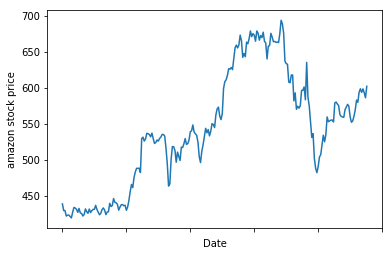

In [127]:
import pandas as pd
%matplotlib inline

data = pd.read_csv( 'amazon_result.csv',header=0 )
closingPrice = data['Close']
pos_polarity=data['pos']
neg_polarity=data['neg']
neu_polarity=data['neu']
closingPrice.index = data['Date']
pos_polarity.index = data['Date']
neg_polarity.index = data['Date']
neu_polarity.index = data['Date']
ax = closingPrice.plot(kind='line')
ax.set(ylabel='amazon stock price')


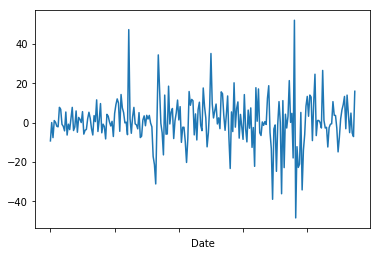

In [128]:
Num = closingPrice.shape[0]
price = pd.Series(closingPrice[1:Num].values - closingPrice[ 0:Num-1].values, index=closingPrice.index[1:])

price.plot(kind='line')

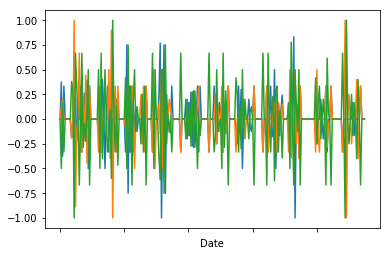

In [129]:
N = pos_polarity.shape[0]
Y = pd.Series(pos_polarity[1:N].values - pos_polarity[ 0:N-1].values, index=pos_polarity.index[1:])
Z = pd.Series(neg_polarity[1:N].values - neg_polarity[ 0:N-1].values, index=neg_polarity.index[1:])
L = pd.Series(neu_polarity[1:N].values - neu_polarity[ 0:N-1].values, index=neu_polarity.index[1:])
Y.plot(kind='line')
Z.plot(kind='line')
L.plot(kind='line')


In [151]:

N = Y.shape[0]
X = pd.DataFrame()
X['price t-3'] = price[1:N-2].values
X['price t-2'] = price[2:N-1].values
X['price t-1'] = price[3:N].values

X['pos t-3'] = Y[1:N-2].values
X['pos t-2'] = Y[2:N-1].values
X['pos t-1'] = Y[3:N].values

X['neg t-3'] = Z[1:N-2].values
X['neg t-2'] = Z[2:N-1].values
X['neg t-1'] = Z[3:N].values

X['neu t-3'] = L[1:N-2].values
X['neu t-2'] = L[2:N-1].values
X['neu t-1'] = L[3:N].values



X = X[:-1]

X.index = Y[4:].index
X.head()

price t-3  price t-2  price t-1   pos t-3   pos t-2   pos t-1  \
Date                                                                      
5/4/2015   0.059997  -7.589996   1.089996  0.375000 -0.375000  0.333333   
5/5/2015  -7.589996   1.089996   0.170014 -0.375000  0.333333  0.000000   
5/6/2015   1.089996   0.170014  -1.850007  0.333333  0.000000  0.000000   
5/7/2015   0.170014  -1.850007  -2.089996  0.000000  0.000000  0.000000   
5/8/2015  -1.850007  -2.089996   7.779999  0.000000  0.000000  0.000000   

           neg t-3   neg t-2  neg t-1   neu t-3   neu t-2   neu t-1  
Date                                                                 
5/4/2015  0.125000  0.208333      0.0 -0.500000  0.166667 -0.333333  
5/5/2015  0.208333  0.000000      0.0  0.166667 -0.333333  0.000000  
5/6/2015  0.000000  0.000000      0.0 -0.333333  0.000000  0.000000  
5/7/2015  0.000000  0.000000      0.0  0.000000  0.000000  0.000000  
5/8/2015  0.000000  0.000000      0.0  0.000000  0.000000  0.000000

In [152]:
y=price[4:]
y.head()

Date
5/4/2015    0.170014
5/5/2015   -1.850007
5/6/2015   -2.089996
5/7/2015    7.779999
5/8/2015    6.809997
dtype: float64

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)

In [163]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-square = %.4f" % r2_score(y_test, y_pred))
print('Slope Coefficients:', regr.coef_ )
print('Intercept:', regr.intercept_ )

Root mean squared error = 12.4497
R-square = -0.5134
Slope Coefficients: [-5.21333765e-02  1.84900417e-01 -3.56316071e-02 -8.80864758e+09
 -1.28058325e+09 -2.81716508e+09 -8.80864759e+09 -1.28058326e+09
 -2.81716508e+09 -8.80864758e+09 -1.28058326e+09 -2.81716507e+09]
Intercept: -0.40146967361479263
